# SD212: Graph mining
## Lab 3: Graph structure

In this lab, you will learn to:
* work with **sparse matrices**,
* highlight the **small-world property** of a graph,
* estimate the **clustering coefficient** of a graph,
* generate a **Watts-Strogatz** graph with both the small-world property and a high clustering coefficient.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
from scipy import sparse as sp

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Datasets

You will need the following datasets:
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. Sparse matrices

You will work with adjacency matrices in [scipy CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [7]:
# A simple graph
graph = nx.erdos_renyi_graph(10, 0.4)

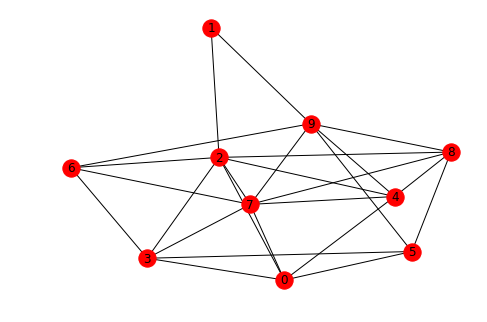

In [8]:
nx.draw(graph, with_labels=True)

In [9]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 25
Average degree:   5.0000


In [10]:
# Density
n = graph.number_of_nodes()
m = graph.number_of_edges()
density = 2 * m / n / (n - 1)
print(density)

0.5555555555555556


In [11]:
# Dense adjacency matrix (numpy array)
adjacency = nx.to_numpy_array(graph)

In [12]:
adjacency

array([[ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.]])

## CSR format

In [13]:
# Sparse adjacency matrix (scipy csr matrix)
adjacency = nx.to_scipy_sparse_matrix(graph)

In [14]:
adjacency

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [15]:
adjacency.todense()

matrix([[0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
        [1, 0, 1, 0, 0, 1, 1, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 1, 0, 0, 1, 1, 1, 1, 1, 0]], dtype=int64)

In [16]:
# Data
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [17]:
# Indices (columns)
adjacency.indices

array([2, 3, 4, 5, 7, 2, 9, 0, 1, 3, 4, 6, 7, 8, 0, 2, 5, 6, 7, 0, 2, 7, 8,
       9, 0, 3, 8, 9, 2, 3, 7, 9, 0, 2, 3, 4, 6, 8, 9, 2, 4, 5, 7, 9, 1, 4,
       5, 6, 7, 8], dtype=int32)

In [18]:
# Index pointers (rows)
adjacency.indptr

array([ 0,  5,  7, 14, 19, 24, 28, 32, 39, 44, 50], dtype=int32)

## To do

* Generate a new random graph of 10 nodes
* Get the corresponding adjacency matrix as numpy array
* Guess the first 3 entries and the last 3 entries of each vector of the adjacency matrix in ```scipy csr format```: ```data, indices, indptr```
* Check your guess.

The adjacency matrix as a numpy array is: 
[[ 0.  0.  0.  0.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  0.  1.  1.  0.  1.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[4 5 7 4 5 6 5 8 4 5 6 8 0 1 3 6 7 9 0 1 2 3 1 3 4 7 0 4 6 2 3 4]
[ 0  3  6  8 12 18 22 26 29 31 32]


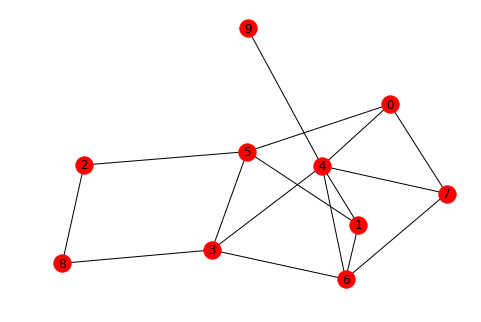

In [19]:
graph = nx.erdos_renyi_graph(10, 0.4)

nx.draw(graph, with_labels=True)

adjacency = nx.to_numpy_array(graph)

print('The adjacency matrix as a numpy array is: \n{}\n'.format(adjacency))

adjacency = nx.to_scipy_sparse_matrix(graph)
print(adjacency.data)
print(adjacency.indices)
print(adjacency.indptr)

## Using sparse matrices

In [20]:
def get_degrees(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int))

In [21]:
get_degrees(adjacency)

array([3, 3, 2, 4, 6, 4, 4, 3, 2, 1], dtype=int64)

In [22]:
def get_neighbors(adjacency, node):
    n = adjacency.shape[0]
    unit_vector = np.zeros(n, dtype = int)
    unit_vector[node] = 1
    return adjacency.dot(unit_vector)

## To do

* Write a function computing the distances from any given node (see below).<br>
Use distance -1 for nodes that are not accessible.

In [23]:
def get_distances(adjacency, node):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int) # initialization, no node is accessible

    paths = np.zeros(n, dtype = int)
    paths[node] = 1

    for i in range(n-1): # the longest possible path has a length n-1
        zeros_before = sum(paths == 0) # which nodes were not accessible
        paths = adjacency.dot(paths)
        zeros_after = sum(paths == 0) # which nodes are accessible now

        if zeros_before == zeros_after: # if a new step does not give access to new nodes, stop
            break

        distances[(distances == -1) * (paths != 0)] = i+1 # update if a node has not been reached and is reached now
        
    distances[node] = 0
    
    return distances

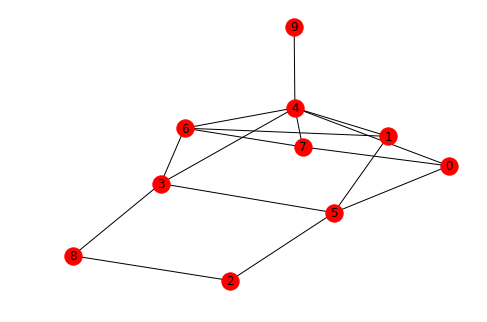

In [24]:
nx.draw(graph, with_labels=True)

In [25]:
get_distances(adjacency, 0)

array([0, 2, 2, 2, 1, 1, 2, 1, 3, 2])

## 2. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Which fraction of the airports can be reached from Paris Charles de Gaulle in 1, 2, 3 flights?
* Which fraction of the pages are accessible from Paris in 1, 2, 3 clicks on Wikipedia for Schools?

In [26]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [27]:
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)

In [28]:
def get_node_from_name(graph, name):
    list_nodes = []
    for u in graph.nodes():
        if graph.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

In [29]:
cdg_node = get_node_from_name(openflights, 'Charles de Gaulle')[0]
cdg = np.zeros(adjacency.shape[0])
cdg[cdg_node] = 1

for nb_flights in range(3):
    cdg = adjacency.dot(cdg)
    print('The fraction of the airports reached in {} flights is: '.format(nb_flights+1) +
          str(sum(cdg != 0)/adjacency.shape[0]))

The fraction of the airports reached in 1 flights is: 0.0752340975137
The fraction of the airports reached in 2 flights is: 0.618986115596
The fraction of the airports reached in 3 flights is: 0.90894413949


In [30]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)

In [31]:
weighted_adjacency_wiki = nx.to_scipy_sparse_matrix(wikipedia)
adjacency_wiki = nx.to_scipy_sparse_matrix(wikipedia, weight = None)

In [32]:
paris_node = get_node_from_name(wikipedia, 'Paris')[0]
paris = np.zeros(adjacency_wiki.shape[0])
paris[paris_node] = 1

for nb_clicks in range(3):
    paris = adjacency_wiki.dot(paris)
    print('The fraction of the pages accessible in {} clicks is: '.format(nb_clicks+1) +
          str(sum(paris != 0)/adjacency_wiki.shape[0]))

The fraction of the pages accessible in 1 clicks is: 0.06708778044
The fraction of the pages accessible in 2 clicks is: 0.798083206273
The fraction of the pages accessible in 3 clicks is: 0.996950555435


## To do

Plot the histogram of the distance between two random airports sampled:
1. uniformly
2. in proportion to their degrees
3. in proportion to their traffics

Use 100 samples per histogram.

Interpret the results.

**Hint:** For 2 and 3, use the parameter ```p``` of the function ```np.random.choice```.

In [33]:
# Two random airports, uniform sampling
airports = list(openflights.nodes())
u, v = np.random.choice(airports, size = 2, replace = False)
print(nx.shortest_path_length(openflights, u, v))

2


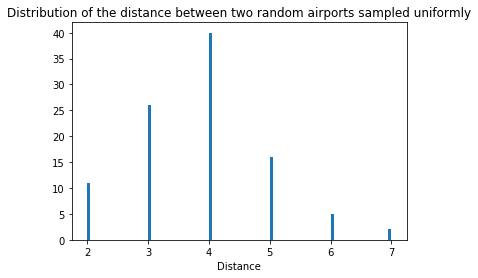

In [34]:
histogram = []
for k in range(100):
    u, v = np.random.choice(airports, size = 2, replace = False)
    histogram.append(nx.shortest_path_length(openflights, u, v))

plt.figure()
plt.title('Distribution of the distance between two random airports sampled uniformly')
plt.xlabel('Distance')

plt.hist(histogram, bins=100)

plt.show()

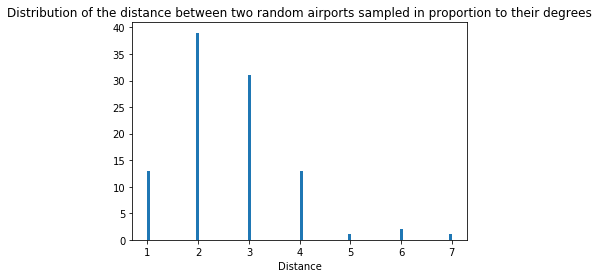

In [35]:
histogram = []
p = get_degrees(adjacency)
p = p/sum(p)
for k in range(100):
    u, v = np.random.choice(airports, size = 2, replace = False, p = p)
    histogram.append(nx.shortest_path_length(openflights, u, v))


plt.figure()
plt.title('Distribution of the distance between two random airports sampled in proportion to their degrees')
plt.xlabel('Distance')

plt.hist(histogram, bins=100)

plt.show()

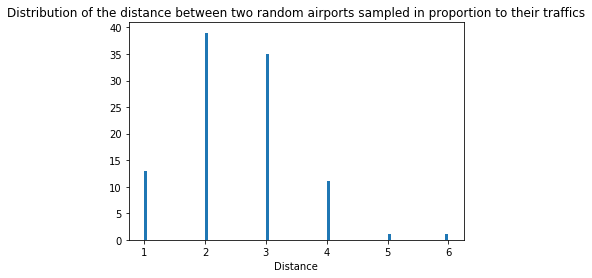

In [36]:
histogram = []
p = get_degrees(weighted_adjacency)
p = p/sum(p)
for k in range(100):
    u, v = np.random.choice(airports, size = 2, replace = False, p = p)
    histogram.append(nx.shortest_path_length(openflights, u, v))


plt.figure()
plt.title('Distribution of the distance between two random airports sampled in proportion to their traffics')
plt.xlabel('Distance')

plt.hist(histogram, bins=100)

plt.show()

## To do

* Find two airports with degree of separation higher than 8, and show the corresponding path on a map.
* Plot the histograms of the distances from each of these airports to all other airports.

In [37]:
u, v = 0, 0
while True:
    u, v = np.random.choice(airports, size = 2, replace = False)
    length_path_u_v = nx.shortest_path_length(openflights, u, v)
    if length_path_u_v >= 8:
        break

print('The two following airports have a degree of separation of {}: \n{} ({}) and {} ({})'.format(length_path_u_v, u, openflights.node[u]['name'], v, openflights.node[v]['name']))

The two following airports have a degree of separation of 8: 
423 (Maroantsetra Airport) and 2248 (Attawapiskat Airport)


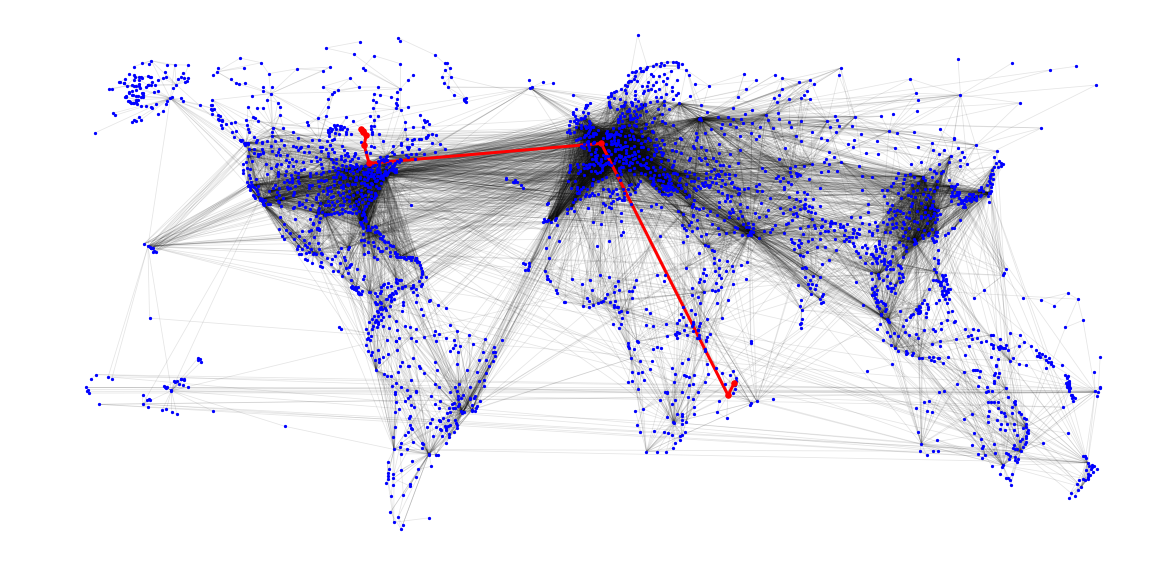

In [38]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

path = nx.shortest_path(openflights, u, v)

edge_list = []
for k in range(len(path)-1):
    edge_list.append(tuple([path[k], path[k+1]]))
    k += 1

plt.figure(figsize=(20, 10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size=5, node_color='b')
nx.draw_networkx_nodes(openflights, pos, nodelist=path, node_size=30, node_color='r')
nx.draw_networkx_edges(openflights, pos, alpha=.1, width=.8)
nx.draw_networkx_edges(openflights, pos, edgelist=edge_list, width=3, arrows=True, edge_color='r')
plt.show()

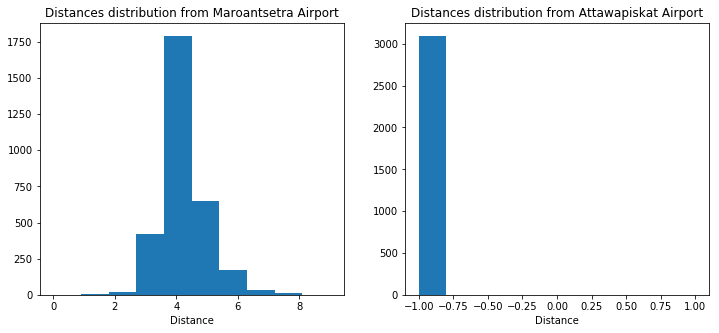

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distances distribution from {}'.format(openflights.node[u]['name']))
plt.xlabel('Distance')
plt.hist(get_distances(adjacency, u))

plt.subplot(1, 2, 2)
plt.title('Distances distribution from {}'.format(openflights.node[v]['name']))
plt.xlabel('Distance')
plt.hist(get_distances(adjacency, v))

plt.show()

## To do

* Plot the histogram of the distances **from** Plato **to** any other page in Wikipedia for Schools (provided a path exists).
* Plot the histogram of the distances **to** Plato **from** any other page in Wikipedia for Schools (provided a path exists).

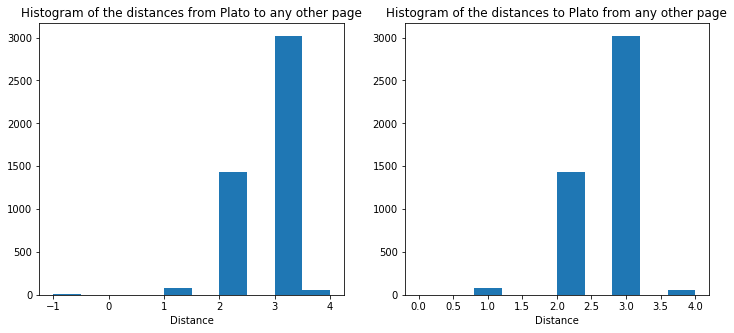

In [40]:
plato_node = get_node_from_name(wikipedia, 'Plato')[0]

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.title('Histogram of the distances from Plato to any other page')
plt.xlabel('Distance')

plt.hist(get_distances(adjacency_wiki, plato_node))


dist_to_plato = []
for u in wikipedia.nodes():
    if nx.has_path(wikipedia, u, plato_node):
        dist_to_plato.append(nx.shortest_path_length(wikipedia, u, plato_node))


plt.subplot(1, 2, 2)
plt.title('Histogram of the distances to Plato from any other page')
plt.xlabel('Distance')

plt.hist(dist_to_plato)

plt.show()

## To do

* Plot the histogram of the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of actors (**without** building the co-starring actor graph).

In [41]:
actors = nx.read_graphml("actors_movies.graphml", node_type = int)

## 3. Clustering coefficient

You will now learn to compute the clustering coefficient of a graph.

## To do

* Show that the clustering coefficient of node $u$ is equal to:
$$
C_u = \frac {N_u} {d_u(d_u-1)}
$$
where $N_u$ is the total number of paths of length 2 from $u$ to a neighbor of $u$.
* Write a function to compute the clustering coefficient of a node (see below).
* Deduce the clustering coefficient of the graph, given by:
$$
C = \frac{\sum_u d_u(d_u -1)C_u}{\sum_u d_u(d_u -1)}.
$$
* Compute the clustering coefficient of Openflights and Wikipedia for Schools (seen as an undirected graph).
* Compare your results with those of the function ```nx.average_clustering``` and explain the differences, if any.

In [42]:
nx.from_scipy_sparse_matrix(adjacency)

In [43]:
def get_local_clustering_coefficient(adjacency, node):
    coef = 0
    node_degree = get_degrees(adjacency)[node]
    
    node_vect = np.zeros(adjacency.shape[0])
    node_vect[node] = 1
    N_node = adjacency.dot(adjacency.dot(adjacency.dot(node_vect)))[node]

    coef = N_node / (node_degree * (node_degree-1))

    return coef

In [44]:
def get_clustering_coefficient(adjacency):
    coef = 0
    normalize = 0

    n = adjacency.shape[0]
    degrees = get_degrees(adjacency)
    
    for u in range(n):
        u_degree = degrees[u]
        u_vect = np.zeros(n, dtype=int)
        u_vect[u] = 1
        
        coef += adjacency.dot(adjacency.dot(adjacency.dot(u_vect)))[u] / 2.
        normalize += u_degree * (u_degree - 1) / 2.

    coef /= normalize

    return coef

# 4. Watts-Strogatz model

Watts-Strogatz graphs have both the small-world property and a high clustering coefficient, for propertly chosen parameters.

In [45]:
graph = nx.watts_strogatz_graph(20, 4, 0)

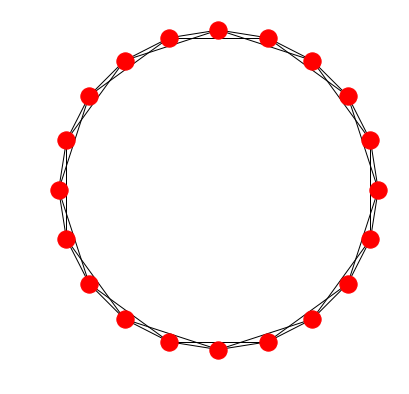

In [46]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

In [47]:
graph = nx.watts_strogatz_graph(20,4,0.5)

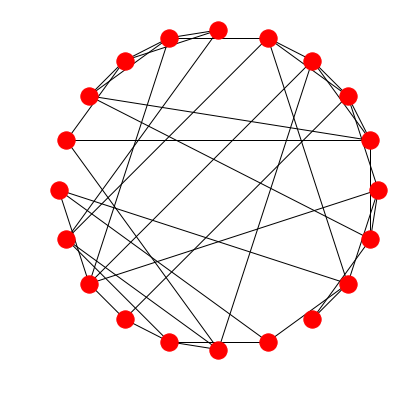

In [48]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

## To do

Generate a graph of 10,000 nodes with:
* average degree 20,
* average clustering coefficent larger than 0.5,
* average degree of separation less than 6.

**Hint:** To get an upper bound on the average path length between any pair of distinct nodes, you can consider all paths going through some well chosen node(s). 

In [52]:
import time

n = 1000
d = 20
p = 0.2

for p in np.linspace(0, 0.1, 10)[1:]:

    graph = nx.watts_strogatz_graph(n, d, p)
    adjacency = nx.to_scipy_sparse_matrix(graph)
    degrees = get_degrees(adjacency)

    C = get_clustering_coefficient(adjacency)

    nodes_hd = np.argwhere(degrees == max(degrees)).ravel()
    lengths_to_hd = []

    for k in range(n):
        closest = np.argmin(np.abs(nodes_hd - k))
        lengths_to_hd.append(nx.shortest_path_length(graph, k, nodes_hd[closest]))

    lengths_matrix = np.zeros((n, n))

    t0 = time.time()

    for i in range(n):

        if (time.time() - t0 > 30):
            print('Too long')
            break

        for j in range(i):
            if (adjacency[i, j] == 1):
                lengths_matrix[i, j] = 1
                lengths_matrix[j, i] = 1
            else:
                path_length = lengths_to_hd[i] + lengths_to_hd[j]
                lengths_matrix[i, j] = path_length
                lengths_matrix[j, i] = path_length


    upper_bound_path_length = sum(sum(lengths_matrix)) / (n**2 - n)

    print('Number of nodes: {}'.format(n))
    print('The average degree is: {}'.format(d))
    print('The probability is: {}'.format(round(p, 4)))
    print('The average clustering coefficient is: {} '.format(round(C, 4)))
    print('The upper bound of the average degree of separation is: {}\n'.format(round(upper_bound_path_length - 1, 4)))

Number of nodes: 1000
The average degree is: 20
The probability is: 0.0111
The average clustering coefficient is: 0.6864 
The upper bound of the average degree of separation is: 7.7948

Number of nodes: 1000
The average degree is: 20
The probability is: 0.0222
The average clustering coefficient is: 0.6637 
The upper bound of the average degree of separation is: 3.8084

Number of nodes: 1000
The average degree is: 20
The probability is: 0.0333
The average clustering coefficient is: 0.642 
The upper bound of the average degree of separation is: 5.8388

Number of nodes: 1000
The average degree is: 20
The probability is: 0.0444
The average clustering coefficient is: 0.613 
The upper bound of the average degree of separation is: 5.3567

Number of nodes: 1000
The average degree is: 20
The probability is: 0.0556
The average clustering coefficient is: 0.6069 
The upper bound of the average degree of separation is: 5.343

Number of nodes: 1000
The average degree is: 20
The probability is: 0.066